In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import sys
import time
import sklearn
import tensorflow as tf
from tensorflow import keras
import pandas as pd

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd,  sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.1.0
sys.version_info(major=3, minor=7, micro=3, releaselevel='final', serial=0)
matplotlib 3.1.3
numpy 1.18.1
pandas 1.0.1
sklearn 0.22.2
tensorflow 2.1.0
tensorflow_core.python.keras.api._v2.keras 2.2.4-tf


In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(housing.data, housing.target, random_state =7)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_all, y_train_all, random_state =11)

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(3870, 8) (3870,)
(11610, 8) (11610,)
(5160, 8) (5160,)


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)


In [11]:
# 子类API
class WideDeepModel(keras.models.Model):
    def __init__(self):
        super(WideDeepModel, self).__init__()
        '''定义模型的层次'''
        self.hidden1_layer = keras.layers.Dense(30, activation = 'relu')
        self.hidden2_layer = keras.layers.Dense(30, activation = 'relu')
        self.output_layer = keras.layers.Dense(1)
    def call(self, input):
        '''完成模型的正向计算'''
        hidden1 = self.hidden1_layer(input)
        hidden2 = self.hidden2_layer(hidden1)
        concat = keras.layers.concatenate([input, hidden2])
        output = self.output_layer(concat)
        return output
        
# model = WideDeepModel()
model = keras.models.Sequential([WideDeepModel(),])
model.build(input_shape = (None, 8))

model.summary()
model.compile(loss = 'mean_squared_error', optimizer = 'sgd')
callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=1e-2)]


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
wide_deep_model_1 (WideDeepM multiple                  1239      
Total params: 1,239
Trainable params: 1,239
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = model.fit(x_train_scaled, y_train, epochs = 100, validation_data = [x_valid_scaled, y_valid], callbacks = callbacks)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 46us/sample - loss: 1.5398 - val_loss: 2.0358
Epoch 2/100
11610/11610 [==============================] - 0s 30us/sample - loss: nan - val_loss: nan
Epoch 3/100
11610/11610 [==============================] - 0s 29us/sample - loss: nan - val_loss: nan
Epoch 4/100
11610/11610 [==============================] - 0s 30us/sample - loss: nan - val_loss: nan
Epoch 5/100
11610/11610 [==============================] - 0s 29us/sample - loss: nan - val_loss: nan
Epoch 6/100
11610/11610 [==============================] - 0s 29us/sample - loss: nan - val_loss: nan


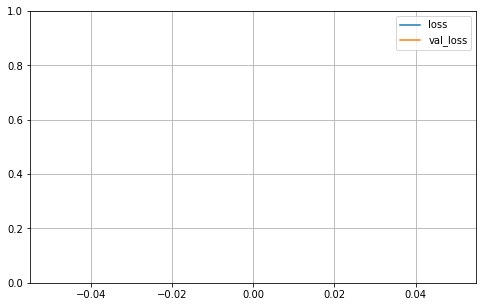

In [8]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize = (8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
    
plot_learning_curves(history)
# 学习曲线前期平缓的原因：
# 1.参数众多，训练不充分
# 2. 梯度消失->链式法则-> 复合函数f(g(x))对其求导的时候值很小
# 批归一化可以缓解梯度消失

In [9]:
model.evaluate(x_test_scaled, y_test)

5160/5160 [==============================] - 0s 14us/sample - loss: nan


nan